In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
#preprocessing

lnames = ['movie_id','imdb_id','tmdb_id']
links = pd.read_csv('ml-latest-small/links.csv', sep=',', header=None, names=lnames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('ml-latest-small/ratings.csv', sep=',', header=None, names=rnames)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_csv('ml-latest-small/movies.csv', sep=',', header=None, names=mnames)

In [3]:
data = pd.merge(pd.merge(movies, ratings), links)
data = data.drop([0])#first row is labels
data[:5]

,movie_id,title,genres,user_id,rating,timestamp,imdb_id,tmdb_id
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,0114709,862
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,0114709,862
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,0114709,862
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,0114709,862
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,0114709,862


In [4]:
#Each movie average rating
data['rating'] = pd.to_numeric(data['rating'], downcast="float")
data['timestamp'] = data['timestamp'].astype(int)
mean_ratings = data.pivot_table(values='rating', index='title', aggfunc='mean')
mean_ratings

,rating
title,
'71 (2014),4.000000
'Hellboy': The Seeds of Creation (2004),4.000000
'Round Midnight (1986),3.500000
'Salem's Lot (2004),5.000000
'Til There Was You (1997),4.000000
...,...
eXistenZ (1999),3.863636
xXx (2002),2.770833
xXx: State of the Union (2005),2.000000


In [5]:
#Highest rated movies
top_movies = mean_ratings.sort_values(['rating'], ascending=False)
top_movies[:10]

,rating
title,
Gena the Crocodile (1969),5.0
True Stories (1986),5.0
Cosmic Scrat-tastrophe (2015),5.0
Love and Pigeons (1985),5.0
Red Sorghum (Hong gao liang) (1987),5.0
"Thin Line Between Love and Hate, A (1996)",5.0
Lesson Faust (1994),5.0
Eva (2011),5.0
Who Killed Chea Vichea? (2010),5.0


In [6]:
#removing outliers 
ratings_by_title = data.groupby('title').size()
ratings_by_title

title
'71 (2014)                                    1
'Hellboy': The Seeds of Creation (2004)       1
'Round Midnight (1986)                        2
'Salem's Lot (2004)                           1
'Til There Was You (1997)                     2
                                             ..
eXistenZ (1999)                              22
xXx (2002)                                   24
xXx: State of the Union (2005)                5
¡Three Amigos! (1986)                        26
À nous la liberté (Freedom for Us) (1931)     1
Length: 9719, dtype: int64

In [8]:
#titles with atleast 1% of the number of ratings as the most rated movie
min_ratings = max(ratings_by_title)*0.01
min_ratings = int(min_ratings)
print("minimum number of ratings: "+str(min_ratings))
active_titles = ratings_by_title.index[ratings_by_title >= min_ratings]
active_titles

minimum number of ratings: 3


Index([''burbs, The (1989)', '(500) Days of Summer (2009)',
       '*batteries not included (1987)', '...And Justice for All (1979)',
       '10 (1979)', '10 Cloverfield Lane (2016)', '10 Items or Less (2006)',
       '10 Things I Hate About You (1999)', '10,000 BC (2008)',
       '100 Girls (2000)',
       ...
       'Zoolander (2001)', 'Zoolander 2 (2016)', 'Zootopia (2016)',
       'Zulu (1964)', '[REC] (2007)', '[REC]² (2009)', 'eXistenZ (1999)',
       'xXx (2002)', 'xXx: State of the Union (2005)',
       '¡Three Amigos! (1986)'],
      dtype='object', name='title', length=4980)

In [9]:
#Highest rated movies with enough ratings to qualify
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings = mean_ratings.sort_values(by='rating', ascending=False)
mean_ratings

,rating
title,
"Trial, The (Procès, Le) (1962)",4.900000
What We Do in the Shadows (2014),4.833333
Bad Boy Bubby (1993),4.833333
Woman in the Dunes (Suna no onna) (1964),4.750000
"Three Billboards Outside Ebbing, Missouri (2017)",4.750000
...,...
Date Movie (2006),0.833333
From Justin to Kelly (2003),0.833333
It's Pat (1994),0.833333


In [10]:
data['user_id'] = data['user_id'].astype(str).astype(int)
sorted_by_user = data.sort_values(by = 'user_id')
sorted_by_user

,movie_id,title,genres,user_id,rating,timestamp,imdb_id,tmdb_id
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,0114709,862
35549,1777,"Wedding Singer, The (1998)",Comedy|Romance,1,4.0,964981230,0120888,11003
35250,1732,"Big Lebowski, The (1998)",Comedy|Crime,1,5.0,964981125,0118715,115
34349,1676,Starship Troopers (1997),Action|Sci-Fi,1,3.0,964982620,0120201,563
2380,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1,5.0,964982931,0114814,629
...,...,...,...,...,...,...,...,...
71057,6387,Once a Thief (Zong heng si hai) (1991),Action|Comedy|Crime|Thriller,610,3.5,1479542038,0101020,47423
87455,59915,Stuck (2007),Horror|Thriller,610,3.5,1493848708,0758786,13848
97037,111663,Zombeavers (2014),Action|Comedy|Horror,610,3.5,1493848822,2784512,254474
98182,122886,Star Wars: Episode VII - The Force Awakens (2015),Action|Adventure|Fantasy|Sci-Fi|IMAX,610,4.5,1479544589,2488496,140607


In [11]:
#Data Encoding: each user and their movie ratings
n_users = data.user_id.unique().shape[0]
print(n_users, ' users')
n_movies = data.movie_id.unique().shape[0]
print(n_movies, ' movies')
ratings_matrix = sorted_by_user.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0)
ratings_matrix

610  users
9724  movies


movie_id,1,10,100,100044,100068,100083,100106,100159,100163,100194,...,99750,99764,998,99813,99846,99853,999,99910,99917,99992
user_id,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
R = np.array(ratings_matrix)
sparsity = float(len(R.nonzero()[0]))
sparsity /= (R.shape[0] * R.shape[1])
sparsity *= 100
print('Sparsity: {:.2f}%'.format(sparsity))

Sparsity: 1.70%


In [17]:
#Train and test matrix fact. adapted from towardsdatascience
def train_test_split(ratings):
    
    validation = np.zeros(ratings.shape)
    train = ratings.copy()
    
    for user in np.arange(ratings.shape[0]):
        if len(ratings[user,:].nonzero()[0]) > 0:#every user that has rated a movie
            val_ratings = np.random.choice(
                ratings[user, :].nonzero()[0], 
                size=3,#remove 3 ratings
                replace=False
            )
            train[user, val_ratings] = 0
            validation[user, val_ratings] = ratings[user, val_ratings]
    return train, validation

In [23]:
train, val = train_test_split(R)

train

array([[4. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [2.5, 4. , 0. , ..., 0. , 0. , 0. ],
       [3. , 4. , 0. , ..., 0. , 0. , 0. ],
       [5. , 0. , 0. , ..., 0. , 3. , 0. ]], dtype=float32)

In [30]:
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [50]:
def predict(X_train, X_val, n_iters=200, n_latent_features=3, lmbda=0.1, learning_rate=0.001):
    m, n = X_train.shape

    P = 3 * np.random.rand(n_latent_features, m)
    Q = 3 * np.random.rand(n_latent_features, n)
    
    train_error = []
    val_error = []

    users, movies = X_train.nonzero()
    
    for epoch in range(n_iters):
        for u, i in zip(users, movies):
            error = X_train[u, i] -  np.dot(P[:,u],  Q[:,i])
            P[:, u] +=  learning_rate * (error *  Q[:, i] -  lmbda *  P[:, u])
            Q[:, i] +=  learning_rate * (error *  P[:, u] -  lmbda *  Q[:, i])

        train_rmse = rmse(np.dot(P.T, Q), X_train)
        val_rmse = rmse(np.dot(P.T, Q), X_val)
        train_error.append(train_rmse)
        val_error.append(val_rmse)
        
    return np.dot(P.T, Q) , train_error, val_error

In [51]:
prediction, t_err, v_err = predict(train, val)

prediction.shape

(610, 9724)

In [53]:
err = rmse(prediction, R)
print(err)

0.8358104478226517


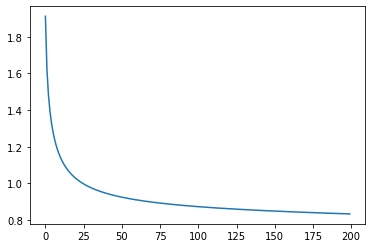

In [52]:
plt.plot(range(200), t_err)
plt.show()